In [1]:
import pandas as pd

In [2]:
df_data = pd.read_csv("../../raw_data/healthcare-dataset-stroke-data.csv")
df_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df_data = df_data.drop(columns=["id"])
df_data.shape

(5110, 11)

In [4]:
df_data["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [5]:
df_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
df_data["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [14]:
df_data_null = df_data.isna().astype(int)

In [16]:
df_data["is_null"] = df_data_null.sum(axis=1)
df_data["is_null"].value_counts()

is_null
0    4909
1     201
Name: count, dtype: int64

In [19]:
df_data[df_data["is_null"]==1]["stroke"].value_counts()

stroke
0    161
1     40
Name: count, dtype: int64

In [21]:
matrix_summary = []

for column in df_data_null.columns:
    row = [column, 0, 0]

    value_counts = df_data_null[column].value_counts()

    if 1 in value_counts.index:
        row[1] = value_counts[1]
    
    if 0 in value_counts.index:
        row[2] = value_counts[0]
    
    matrix_summary.append(row)

df_summary = pd.DataFrame(data=matrix_summary, columns=["feature", "is_null", "is_not_null"])
df_summary = df_summary.sort_values(by="is_null", ascending=False)
df_summary

,feature,is_null,is_not_null
8,bmi,201,4909
1,age,0,5110
0,gender,0,5110
2,hypertension,0,5110
3,heart_disease,0,5110
5,work_type,0,5110
4,ever_married,0,5110
6,Residence_type,0,5110
7,avg_glucose_level,0,5110
9,smoking_status,0,5110


In [22]:
df_data["bmi"] = df_data["bmi"].fillna(df_data["bmi"].mean())

In [23]:
df_data["bmi"].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [24]:
df_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_null
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0


In [31]:
df_data.groupby(by=["gender", "stroke"]).count()

age  hypertension  heart_disease  ever_married  work_type  \
gender stroke                                                               
Female 0       2853          2853           2853          2853       2853   
       1        141           141            141           141        141   
Male   0       2007          2007           2007          2007       2007   
       1        108           108            108           108        108   
Other  0          1             1              1             1          1   

               Residence_type  avg_glucose_level   bmi  smoking_status  \
gender stroke                                                            
Female 0                 2853               2853  2853            2853   
       1                  141                141   141             141   
Male   0                 2007               2007  2007            2007   
       1                  108                108   108             108   
Other  0                    1                  1     1               1   

               is_null  
gender stroke           
Female 0          2853  
       1           141  
Male   0          2007  
       1           108  
Other  0             1

In [32]:
df_data = df_data[df_data["gender"] != "Other"]
df_data.shape

(5109, 12)

In [33]:
df_data.groupby(by=["hypertension", "stroke"]).count()

gender   age  heart_disease  ever_married  work_type  \
hypertension stroke                                                         
0            0         4428  4428           4428          4428       4428   
             1          183   183            183           183        183   
1            0          432   432            432           432        432   
             1           66    66             66            66         66   

                     Residence_type  avg_glucose_level   bmi  smoking_status  \
hypertension stroke                                                            
0            0                 4428               4428  4428            4428   
             1                  183                183   183             183   
1            0                  432                432   432             432   
             1                   66                 66    66              66   

                     is_null  
hypertension stroke           
0            0          4428  
             1           183  
1            0           432  
             1            66

In [34]:
df_data.groupby(by=["ever_married", "stroke"]).count()

gender   age  hypertension  heart_disease  work_type  \
ever_married stroke                                                         
No           0         1727  1727          1727           1727       1727   
             1           29    29            29             29         29   
Yes          0         3133  3133          3133           3133       3133   
             1          220   220           220            220        220   

                     Residence_type  avg_glucose_level   bmi  smoking_status  \
ever_married stroke                                                            
No           0                 1727               1727  1727            1727   
             1                   29                 29    29              29   
Yes          0                 3133               3133  3133            3133   
             1                  220                220   220             220   

                     is_null  
ever_married stroke           
No           0          1727  
             1            29  
Yes          0          3133  
             1           220

In [35]:
df_data.groupby(by=["heart_disease", "stroke"]).count()

gender   age  hypertension  ever_married  work_type  \
heart_disease stroke                                                        
0             0         4631  4631          4631          4631       4631   
              1          202   202           202           202        202   
1             0          229   229           229           229        229   
              1           47    47            47            47         47   

                      Residence_type  avg_glucose_level   bmi  smoking_status  \
heart_disease stroke                                                            
0             0                 4631               4631  4631            4631   
              1                  202                202   202             202   
1             0                  229                229   229             229   
              1                   47                 47    47              47   

                      is_null  
heart_disease stroke           
0             0          4631  
              1           202  
1             0           229  
              1            47

In [36]:
df_data.groupby(by=["Residence_type", "stroke"]).count()

gender   age  hypertension  heart_disease  \
Residence_type stroke                                              
Rural          0         2399  2399          2399           2399   
               1          114   114           114            114   
Urban          0         2461  2461          2461           2461   
               1          135   135           135            135   

                       ever_married  work_type  avg_glucose_level   bmi  \
Residence_type stroke                                                     
Rural          0               2399       2399               2399  2399   
               1                114        114                114   114   
Urban          0               2461       2461               2461  2461   
               1                135        135                135   135   

                       smoking_status  is_null  
Residence_type stroke                           
Rural          0                 2399     2399  
               1                  114      114  
Urban          0                 2461     2461  
               1                  135      135

In [37]:
df_data.groupby(by=["work_type", "stroke"]).count()

gender   age  hypertension  heart_disease  ever_married  \
work_type     stroke                                                            
Govt_job      0          624   624           624            624           624   
              1           33    33            33             33            33   
Never_worked  0           22    22            22             22            22   
Private       0         2775  2775          2775           2775          2775   
              1          149   149           149            149           149   
Self-employed 0          754   754           754            754           754   
              1           65    65            65             65            65   
children      0          685   685           685            685           685   
              1            2     2             2              2             2   

                      Residence_type  avg_glucose_level   bmi  smoking_status  \
work_type     stroke                                                            
Govt_job      0                  624                624   624             624   
              1                   33                 33    33              33   
Never_worked  0                   22                 22    22              22   
Private       0                 2775               2775  2775            2775   
              1                  149                149   149             149   
Self-employed 0                  754                754   754             754   
              1                   65                 65    65              65   
children      0                  685                685   685             685   
              1                    2                  2     2               2   

                      is_null  
work_type     stroke           
Govt_job      0           624  
              1            33  
Never_worked  0            22  
Private       0          2775  
              1           149  
Self-employed 0           754  
              1            65  
children      0           685  
              1             2

In [38]:
df_data.groupby(by=["smoking_status", "stroke"]).count()

gender   age  hypertension  heart_disease  \
smoking_status  stroke                                              
Unknown         0         1497  1497          1497           1497   
                1           47    47            47             47   
formerly smoked 0          814   814           814            814   
                1           70    70            70             70   
never smoked    0         1802  1802          1802           1802   
                1           90    90            90             90   
smokes          0          747   747           747            747   
                1           42    42            42             42   

                        ever_married  work_type  Residence_type  \
smoking_status  stroke                                            
Unknown         0               1497       1497            1497   
                1                 47         47              47   
formerly smoked 0                814        814             814   
                1                 70         70              70   
never smoked    0               1802       1802            1802   
                1                 90         90              90   
smokes          0                747        747             747   
                1                 42         42              42   

                        avg_glucose_level   bmi  is_null  
smoking_status  stroke                                    
Unknown         0                    1497  1497     1497  
                1                      47    47       47  
formerly smoked 0                     814   814      814  
                1                      70    70       70  
never smoked    0                    1802  1802     1802  
                1                      90    90       90  
smokes          0                     747   747      747  
                1                      42    42       42

In [39]:
df_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_null
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0


In [40]:
import seaborn as sns

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

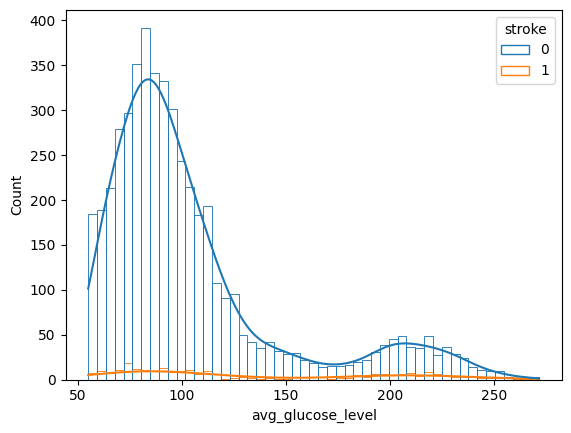

In [45]:
sns.histplot(data=df_data, x="avg_glucose_level", hue="stroke", fill=False, kde=True)

<Axes: ylabel='bmi'>

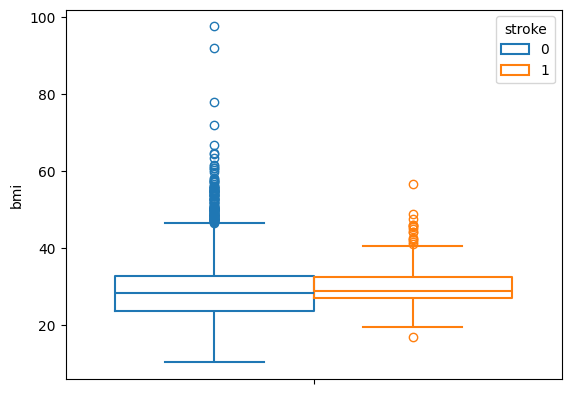

In [47]:
sns.boxplot(data=df_data, y="bmi", hue="stroke", fill=False)

<Axes: ylabel='age'>

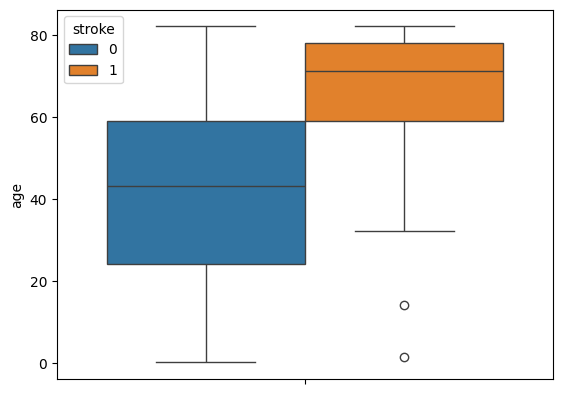

In [41]:
sns.boxplot(data=df_data, y="age", hue="stroke")

In [48]:
df_data[df_data["bmi"]>50]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_null
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1,0
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0,0
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,0
333,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4650,Male,54.0,0,0,Yes,Private,Rural,100.47,50.2,formerly smoked,0,0
4779,Female,58.0,0,0,Yes,Self-employed,Urban,66.71,51.7,never smoked,0,0
4838,Female,51.0,0,0,Yes,Private,Urban,107.72,60.9,Unknown,0,0
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0,0


In [49]:
df_data.to_csv("../../results/1_checked_dataset.csv", index=False)